In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from zlib import crc32
%matplotlib inline

In [36]:
def load_data():
    return pd.read_csv("C:\ML\housing.csv")

In [37]:
housing = load_data()

In [38]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [39]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [40]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [41]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [42]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


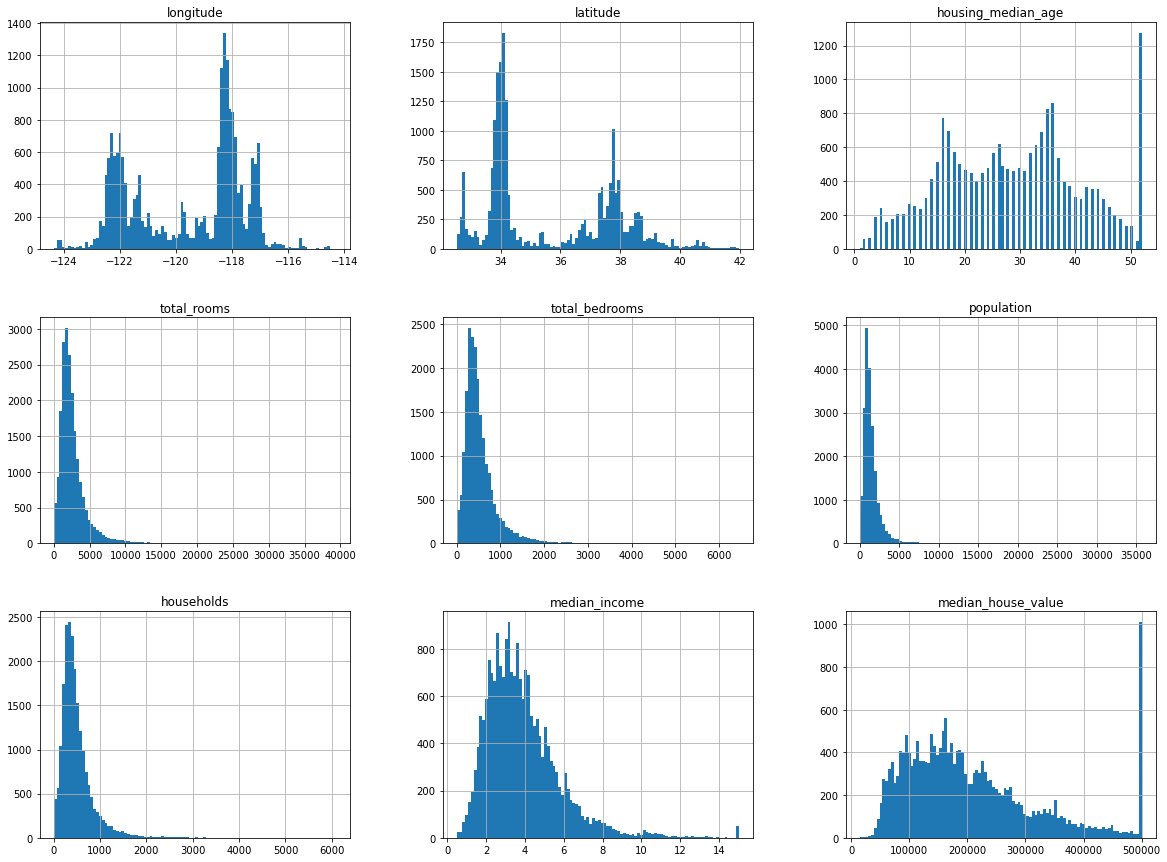

In [43]:
housing.hist(bins=100, figsize=(20,15))
plt.show()

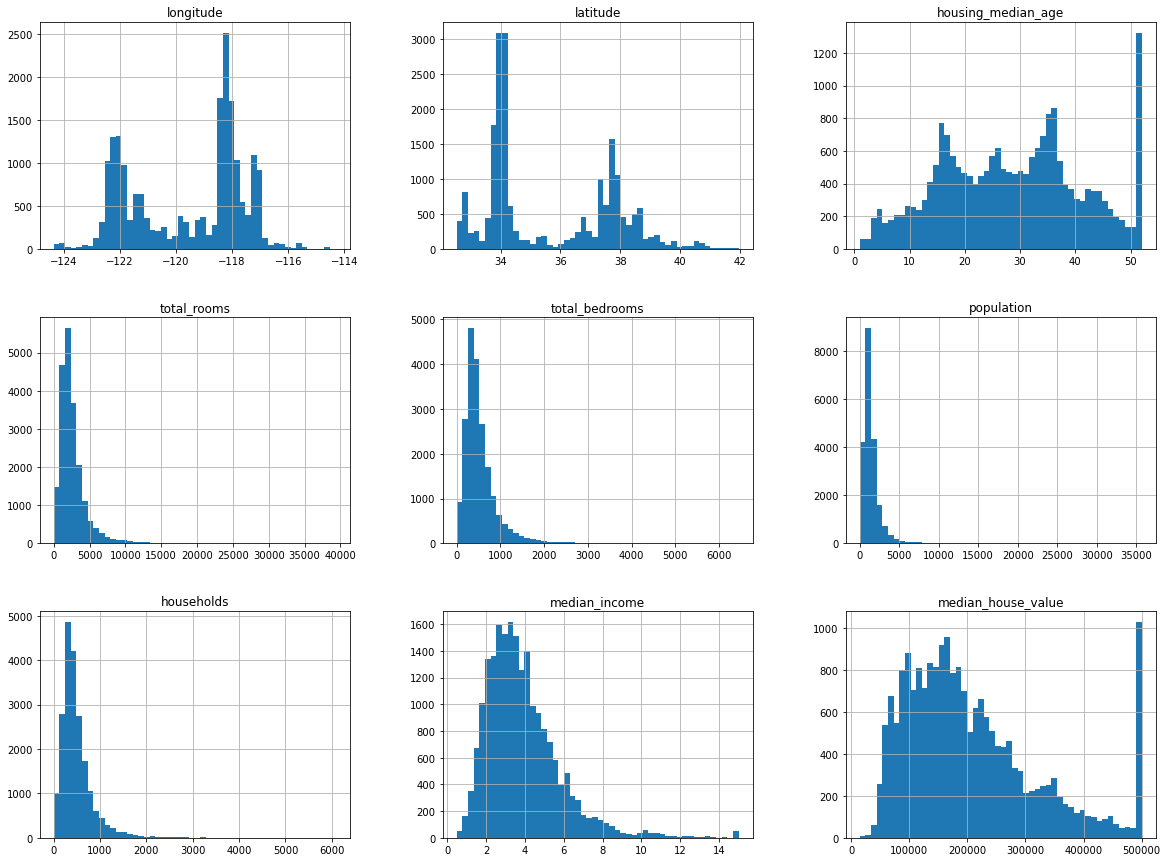

In [44]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [45]:
def create_test_set(data,testRatio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * testRatio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [46]:
train,test = create_test_set(housing,0.2)

In [47]:
len(train)

16512

In [48]:
len(test)

4128

In [49]:
len(housing)

20640

In [50]:
def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [51]:
def split_train_test_by_id(data,test_ratio,id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [52]:
housing_with_id = housing.reset_index()
housing_with_id

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [53]:
train_set, test_set = split_train_test_by_id(housing_with_id,0.2,"index")

In [54]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]

In [55]:
train_set, test_set = split_train_test_by_id(housing_with_id,0.2,"id")

In [56]:
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit

In [57]:
train_set,test_set = train_test_split(housing, test_size = 0.2,random_state = 42)

In [58]:
len(test_set)

4128

In [59]:
len(train_set)

16512

In [60]:
housing['income_cat'] = pd.cut(housing['median_income'],bins=[0,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])

In [61]:
housing['income_cat'].unique()

[5, 4, 3, 2, 1]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

<AxesSubplot:>

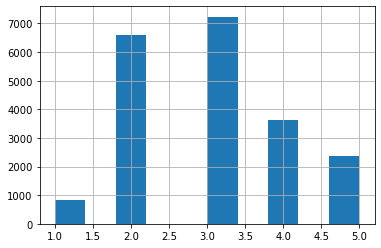

In [62]:
housing['income_cat'].hist()

In [63]:
split = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2,random_state=42)
type(StratifiedShuffleSplit(n_splits = 1,test_size = 0.2,random_state=42))

sklearn.model_selection._split.StratifiedShuffleSplit

In [64]:
for i,j in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[i]
    strat_test_set = housing.loc[j]

In [65]:
import time

In [66]:
t = time.time()
for instance in (strat_train_set,strat_test_set):
    instance.drop("income_cat", axis=1, inplace=True)
print((time.time() - t)*1000)

2.0303726196289062


In [67]:
t = time.time()
strat_train_set.drop(["income_cat"],axis=1,inplace=True)
strat_test_set.drop(["income_cat"],axis=1,inplace = True)
print((time.time() - t)*1000)

KeyError: "['income_cat'] not found in axis"

In [68]:
housing = strat_train_set.copy()

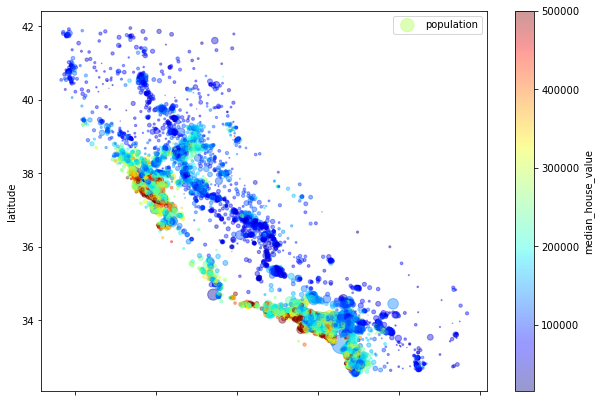

In [69]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,label="population",figsize=(10,7),c="median_house_value",cmap=plt.get_cmap("jet"), colorbar=True,s=housing["population"]/100)
plt.legend()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

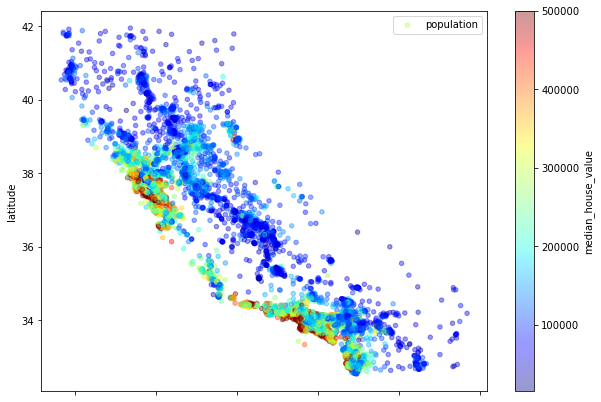

In [70]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,label="population",figsize=(10,7),c="median_house_value",cmap=plt.get_cmap("jet"), colorbar=True)

In [71]:
r_matrix = housing.corr()

In [72]:
r_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='housing_median_age'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot

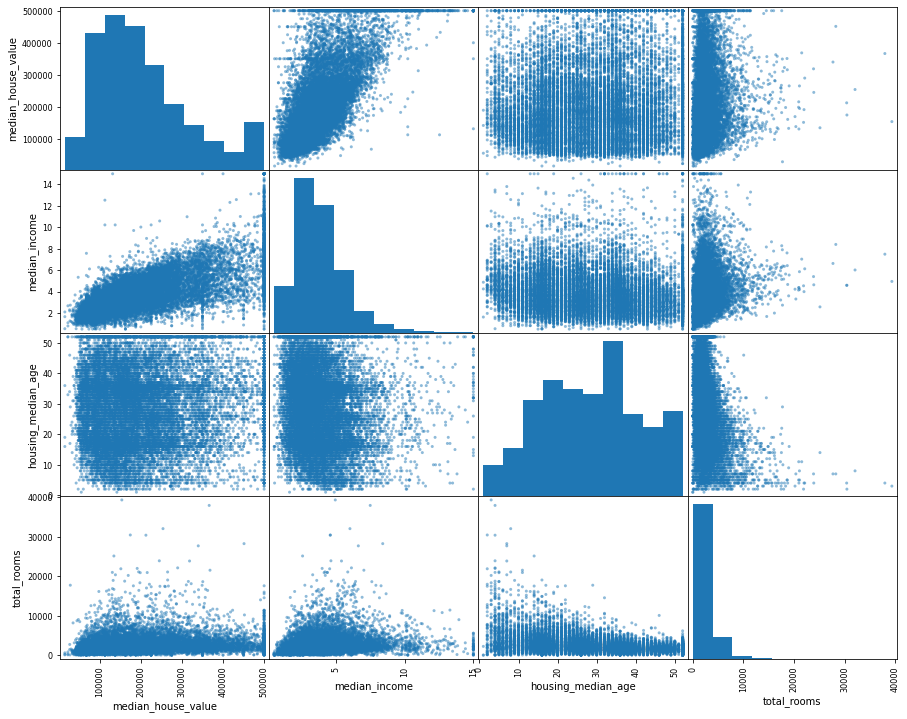

In [73]:
from pandas.plotting import scatter_matrix 
attributes = ["median_house_value","median_income","housing_median_age","total_rooms"]
scatter_matrix(housing[attributes], figsize=(15,12))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

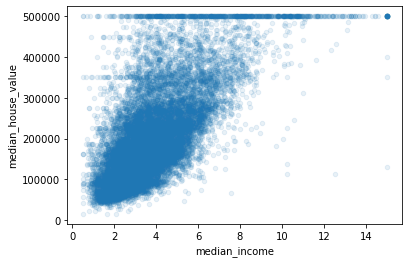

In [74]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha = 0.1)

In [75]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [76]:
r_matrix = housing.corr()
r_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432,-0.028345,0.095603,-0.000410
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724,0.107621,-0.116884,0.005420
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110,-0.147186,0.136788,0.015031
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097,0.127519,-0.192606,-0.024810
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689,0.000377,0.086960,-0.028370
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920,-0.074692,0.037778,0.076225
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506,-0.083009,0.067162,-0.027416
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160,0.311563,-0.624674,0.021822
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000,0.146285,-0.259984,-0.021985
rooms_per_household,-0.028345,0.107621,-0.147186,0.127519,0.000377,-0.074692,-0.083009,0.311563,0.146285,1.000000,-0.398546,-0.005314


In [77]:
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [78]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median,inplace = True)

In [79]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [80]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity",axis = 1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [81]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [82]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [83]:
X = imputer.transform(housing_num)

In [84]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)

In [85]:

housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [86]:
housing_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,533.998123,1419.790819,497.060380,3.875589
std,2.001860,2.138058,12.574726,2138.458419,410.839621,1115.686241,375.720845,1.904950
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566775
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.250000,602.000000,4.744475
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


In [87]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,533.998123,1419.790819,497.060380,3.875589
std,2.001860,2.138058,12.574726,2138.458419,410.839621,1115.686241,375.720845,1.904950
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566775
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.250000,602.000000,4.744475
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


In [88]:
housing_cat = housing[["ocean_proximity"]]

In [89]:
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [90]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [91]:
housing_cat_encoded[:20]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [3.],
       [1.],
       [1.],
       [1.]])

In [92]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [93]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

In [94]:
housing_cat_encoded = cat_encoder.fit_transform(housing_cat)

In [95]:
housing_cat_encoded[:20].toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [96]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [97]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):

    def __init__(self,add_bpr = True):
        self.add_bpr = add_bpr
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix] #these both are good attributes to tryout
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if(self.add_bpr):
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]
    
        

In [98]:
attr_adder = CombinedAttributesAdder(add_bpr = False)
housing_with_extra_attr = attr_adder.transform(housing.values)

In [99]:
housing_with_extra_attr

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline(
[
    ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
])

In [101]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [102]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

In [119]:
housing_prepared = full_pipeline.fit_transform(housing)

In [120]:
housing_prepared[:2] #np array perfect for training

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

In [105]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(housing_prepared,housing_labels)

LinearRegression()

In [106]:
housing_prepared.shape

(16512, 16)

In [107]:
sample_transformed_data.shape

NameError: name 'sample_transformed_data' is not defined

In [109]:
sample_transformed_data[0]

NameError: name 'sample_transformed_data' is not defined

In [110]:
housing_prepared[0]

array([-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
       -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
        0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [111]:
zero_matrix = np.zeros(10).reshape(5,2)

In [112]:
zero_matrix

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [126]:
sample_test_data = housing_prepared[:5]
sample_test_labels = housing_labels.iloc[:5]
print(linear_regression.predict(sample_test_data))
print(sample_test_labels.values)

[210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
[286600. 340600. 196900.  46300. 254500.]


In [127]:
from sklearn.metrics import mean_squared_error
housing_predictions = linear_regression.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


68628.19819848922

In [128]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


0.0

In [129]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [130]:
tree_rmse_scores

array([69183.46147514, 67502.99058694, 71064.75059677, 70060.46887604,
       70900.60210835, 74853.21219922, 69909.25984814, 71669.37861496,
       76044.66274634, 70212.17661177])

In [131]:
tree_rmse_scores.mean()

71140.09636636818

In [132]:
tree_rmse_scores.std()

2424.5354692979295

In [133]:
def display_scores(scores):
     print("Scores:", scores)
     print("Mean:", scores.mean())
     print("Standard deviation:", scores.std())

In [134]:
display_scores(tree_rmse_scores)

Scores: [69183.46147514 67502.99058694 71064.75059677 70060.46887604
 70900.60210835 74853.21219922 69909.25984814 71669.37861496
 76044.66274634 70212.17661177]
Mean: 71140.09636636818
Standard deviation: 2424.5354692979295


In [135]:
scores = cross_val_score(linear_regression, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [136]:
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798347


In [139]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor()

In [152]:
print(1)
scores = cross_val_score(forest_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
print(2)
forest_rmse_scores = np.sqrt(-scores)
print("hyeyyy")

1
2
hyeyyy


In [153]:
display_scores(forest_rmse_scores)

Scores: [49726.21458269 47711.82775884 49572.13679769 52325.38105371
 49744.3750053  53085.72481481 48605.50152229 48366.25024357
 53110.05045803 50060.9051097 ]
Mean: 50230.836734664466
Standard deviation: 1850.5466211241496


In [154]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels,housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18793.39820301599

In [155]:
import joblib
joblib.dump(tree_reg,"tree_reg.pkl")

['tree_reg.pkl']

In [156]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [158]:
grid_search.cv_results_

{'mean_fit_time': array([0.04683385, 0.16025147, 0.48317289, 0.0760468 , 0.28940282,
        0.74691639, 0.10305338, 0.35023422, 1.04551568, 0.14258523,
        0.43278365, 1.31433582, 0.07398653, 0.25435386, 0.09416828,
        0.3186811 , 0.12608709, 0.39324307]),
 'std_fit_time': array([0.00757999, 0.0056219 , 0.01402151, 0.00343395, 0.05295316,
        0.01143535, 0.00801304, 0.01717158, 0.02770173, 0.01261332,
        0.01613118, 0.02172424, 0.00175454, 0.01446979, 0.00364621,
        0.00979286, 0.00829103, 0.00863333]),
 'mean_score_time': array([0.00221286, 0.00769696, 0.02665458, 0.00179882, 0.00895824,
        0.02136431, 0.00322227, 0.00667067, 0.01992664, 0.00361509,
        0.00776539, 0.02346988, 0.00352998, 0.00731673, 0.00436788,
        0.01148887, 0.00041952, 0.00980134]),
 'std_score_time': array([0.00314813, 0.00299513, 0.00280715, 0.00146873, 0.0012765 ,
        0.00205028, 0.00373583, 0.0038738 , 0.0008011 , 0.00316036,
        0.00396247, 0.00229461, 0.00274194, 

In [159]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [160]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [162]:
grid_search.best_estimator_.feature_importances_

array([7.78113661e-02, 7.40734907e-02, 4.20183920e-02, 1.73857704e-02,
       1.66600382e-02, 1.72676921e-02, 1.57115377e-02, 3.09254185e-01,
       6.20676873e-02, 1.11360784e-01, 8.42094279e-02, 1.22063180e-02,
       1.52266181e-01, 7.12817310e-05, 3.61356313e-03, 4.02228516e-03])

In [165]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [172]:
list(housing.columns[:-1])

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [174]:
extra_attributes = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

In [184]:
total_attributes = list(housing.columns[:-1]) + extra_attributes + list(cat_encoder.categories_[0])

In [185]:
total_attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_hhold',
 'pop_per_hhold',
 'bedrooms_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [186]:
sorted(zip(total_attributes,grid_search.best_estimator_.feature_importances_),reverse=True)

[('total_rooms', 0.017385770440126996),
 ('total_bedrooms', 0.0166600381911752),
 ('rooms_per_hhold', 0.062067687338289795),
 ('population', 0.01726769205733219),
 ('pop_per_hhold', 0.11136078363115443),
 ('median_income', 0.30925418526243154),
 ('longitude', 0.07781136609230141),
 ('latitude', 0.07407349069547568),
 ('housing_median_age', 0.04201839200854758),
 ('households', 0.01571153765797113),
 ('bedrooms_per_room', 0.08420942793138646),
 ('NEAR OCEAN', 0.004022285157779454),
 ('NEAR BAY', 0.0036135631302424347),
 ('ISLAND', 7.128173104360523e-05),
 ('INLAND', 0.15226618067951667),
 ('<1H OCEAN', 0.012206317995225549)]

In [187]:
#evaluating on test set

In [188]:
final_model = grid_search.best_estimator_

In [196]:
X_test = strat_test_set.drop("median_house_value",axis=1)
y_test = strat_test_set["median_house_value"]
X_test_prepared = full_pipeline.transform(X_test)
predictions = final_model.predict(X_test_prepared)

In [197]:
final_mse = mean_squared_error(y_test,predictions)
final_rmse = np.sqrt(final_mse)

In [198]:
final_rmse

48373.37107667646

In [201]:
from scipy import stats 
confidence = 0.95
squared_errors = (predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,loc=squared_errors.mean(),scale=stats.sem(squared_errors)))

array([46400.19935917, 50269.15115727])

In [202]:
squared_errors

5241     1.206520e+07
10970    5.391684e+08
20351    3.572113e+08
6568     1.026134e+07
13285    5.544455e+08
             ...     
20519    5.771205e+08
17430    1.063195e+09
4019     3.827266e+08
12107    1.192781e+09
2398     2.533109e+09
Name: median_house_value, Length: 4128, dtype: float64

In [203]:
joblib.dump(final_model,"housing_model.pkl")

['housing_model.pkl']